# Manasvi Jaipurkar

# THE SPARK FOUNDATION

# TASK-7 Stock Market Prediction using Numerical and Textual Analysis
(Level - Advanced)

Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.
Stock to analyze and predict SENSEX (S&P BSE SENSEX).
Use either R or Python, or both for separate analysis and then combine the findings to create a hybrid model.

In [83]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


# import libraries

In [3]:
#import libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

C:\Users\Manasvi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Manasvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Manasvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2015-01-01', end='2020-06-30')
#since our Textual Analysis dataset containing news from Times of India News Headlines is only till 30th June 2020. 
#So we will assume today is 29th June 2020 and tomorrow is 30th June 2020. And we have to predict the stock price ((high+low+close)/3) and closing price of BSE index 
#for tomorrow 30th June 2020.
unseenbse_data = yf.download('^BSESN', start='2020-06-30', end='2020-07-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
bse_data.columns



Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
unseenbse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)
unseenbse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [10]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1345 entries, 2015-01-02 to 2020-06-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1345 non-null   float64
 1   high      1345 non-null   float64
 2   low       1345 non-null   float64
 3   close     1345 non-null   float64
 4   adjclose  1345 non-null   float64
 5   volume    1345 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.6 KB


In [11]:
unseenbse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2020-06-30 to 2020-06-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1 non-null      float64
 1   high      1 non-null      float64
 2   low       1 non-null      float64
 3   close     1 non-null      float64
 4   adjclose  1 non-null      float64
 5   volume    1 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 56.0 bytes


In [12]:
bse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [13]:
bse_data.tail()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200
2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600
2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600
2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800
2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300


In [14]:
unseenbse_data.head()

,open,high,low,close,adjclose,volume
Date,,,,,,
2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [15]:
bse_data.reset_index(inplace=True)
bse_data.rename(columns={'Date': 'date'}, inplace = True)
bse_data.head()

,date,open,high,low,close,adjclose,volume
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [16]:
unseenbse_data.reset_index(inplace=True)
unseenbse_data.rename(columns={'Date': 'date'}, inplace = True)
unseenbse_data.head()

,date,open,high,low,close,adjclose,volume
0,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [17]:
bse_data['date'] = pd.to_datetime(bse_data['date'], format = '%Y%m%d')
unseenbse_data['date'] = pd.to_datetime(unseenbse_data['date'], format = '%Y%m%d')
#before moving forward let us calculate first the actual price
unseenbsedata_price = round((unseenbse_data['high'] + unseenbse_data['low'] + unseenbse_data['close'])/ 3, 2)
unseenbsedata_price  #actual price

0    34987.5
dtype: float64

# Rolling window analysis of time series

In [18]:
def stock_weekmovingavg(wks, df):
  dateclose_data = pd.DataFrame({'date': df['date'], 'close':df['close']})
  dateclose_data.set_index('date', inplace=True)
  num = wks * 5                                 #calculating the number of days in the week. 5 days because BSE is open for 5 days / week
  dateclose_data['movingavg'] = dateclose_data['close'].rolling(window=num).mean().shift()
  return dateclose_data.dropna()
stock_weekmovingavg(4, bse_data).head()

,close,movingavg
date,,
2015-02-02,29122.269531,28256.509570
2015-02-03,29000.140625,28318.228027
2015-02-04,28883.109375,28376.119043
2015-02-05,28850.970703,28470.901465
2015-02-06,28717.910156,28568.008984


<AxesSubplot:xlabel='date'>

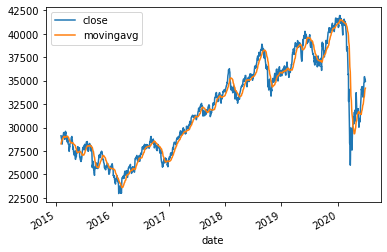

In [19]:
stock_weekmovingavg(4, bse_data).plot()

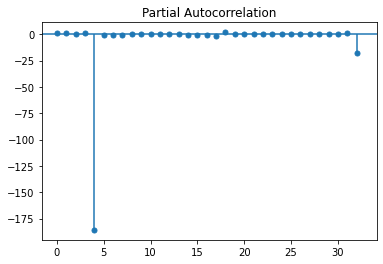

In [21]:
plotfourweek = altdata_fourweek.filter(['date', 'movingavg'], axis=1) #df.copy()
plotfourweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(altdata_fourweek['date']))) 
del plotfourweek['date']
sm.graphics.tsa.plot_pacf(plotfourweek.values.squeeze())
plt.show()


In [23]:
stock_weekmovingavg(16, bse_data).head()

,close,movingavg
date,,
2015-05-05,27440.140625,28447.880933
2015-05-06,26717.369141,28442.283936
2015-05-07,26599.109375,28428.222046
2015-05-08,27105.390625,28423.367651
2015-05-11,27507.300781,28425.824780


<AxesSubplot:xlabel='date'>

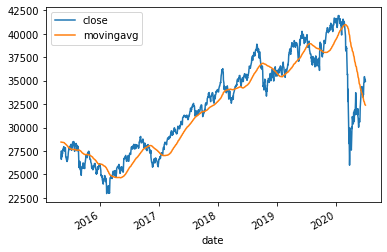

In [24]:
stock_weekmovingavg(16, bse_data).plot()

In [27]:
stock_weekmovingavg(52, bse_data).head()

,close,movingavg
date,,
2016-01-25,24485.949219,27198.907963
2016-01-27,24492.390625,27185.823535
2016-01-28,24469.570312,27172.939190
2016-01-29,24870.689453,27163.254995
2016-02-01,24824.830078,27155.416031


# Creating a rolling window of size 10 and 50 of the BSE index

In [28]:
def rollingwindows(days, df):
  data = df.filter(['date','open','high','low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  rollingwindows_data = data.rolling(window=days).mean().shift()
  return rollingwindows_data.dropna()
rollingwindows(10, bse_data).head()

,open,high,low,close
date,,,,
2015-01-16,27515.904883,27657.483008,27279.612891,27479.296484
2015-01-19,27569.437891,27681.345898,27322.217969,27502.695508
2015-01-20,27596.578906,27708.302930,27363.268945,27544.664453
2015-01-21,27659.640820,27821.338867,27502.047852,27724.385352
2015-01-22,27845.606836,28011.988867,27703.692969,27922.389258


<AxesSubplot:xlabel='date'>

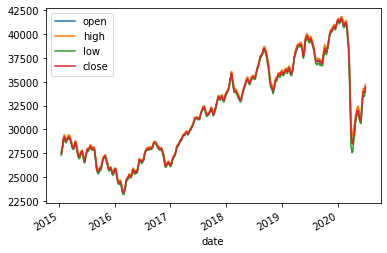

In [29]:
rollingwindows(10, bse_data).plot()

In [30]:
rollingwindows(50, bse_data).head()

,open,high,low,close
date,,,,
2015-03-18,28721.847383,28863.956836,28502.767422,28670.602461
2015-03-19,28746.759180,28881.346836,28523.317422,28685.286836
2015-03-20,28763.295000,28899.631836,28535.814414,28697.833828
2015-03-23,28778.719180,28915.340430,28561.266406,28723.306211
2015-03-24,28805.396367,28942.011250,28589.022031,28748.970195


# Creating the dummy time series:

In [31]:
def boolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['percentchg'] = (data[col].pct_change()) * 100  #percentage change compare to previous volume using pct_change() function
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(col, axis = 1, inplace = True)
  return data.dropna()

In [32]:
boolean_shock(10, bse_data, 'volume')

,percentchg,shock
date,,
2015-01-05,24.324324,1
2015-01-06,53.260870,1
2015-01-07,-13.475177,0
2015-01-08,-32.786885,0
2015-01-09,35.365854,1
...,...,...
2020-06-23,0.398406,0
2020-06-24,5.555556,0
2020-06-25,-7.518797,0


# Pricing shock without volume shock

In [34]:
def priceboolean_shock(percent, df):
  df['date'] = pd.to_datetime(df['date'])
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['priceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['priceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  return data

In [35]:
priceboolean_shock(10, bse_data)

,priceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,0
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2020-06-23,35252.093750,0
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0


# Creating the reverse dummy time series:
Price shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [36]:
def reverseboolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['percentchg'] = (data[col].pct_change()) * 100
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
  data.drop(col, axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()
reverseboolean_shock(2, bse_data, 'close')

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,1
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0
...,...,...
2020-06-22,-1.465151,0
2020-06-23,1.610168,0
2020-06-24,0.077145,0


# Textual Analysis of news from Times of India News Headlines
#import library

In [69]:
#reading the uploaded csv file and assigning to news variable
stock_price  = pd.read_csv('CSVForDate(1).csv')

In [70]:
stock_price

,Date,Open,High,Low,Close
1-January-2015,27485.77,27545.61,27395.34,27507.54,NaN
2-January-2015,27521.28,27937.47,27519.26,27887.90,NaN
5-January-2015,27978.43,28064.49,27786.85,27842.32,NaN
6-January-2015,27694.23,27698.93,26937.06,26987.46,NaN
7-January-2015,26983.43,27051.60,26776.12,26908.82,NaN
...,...,...,...,...,...
25-August-2020,38948.46,39008.89,38679.67,38843.88,NaN
26-August-2020,38930.18,39111.55,38765.09,39073.92,NaN
27-August-2020,39293.53,39326.98,39046.94,39113.47,NaN
28-August-2020,39264.48,39579.58,39235.03,39467.31,NaN


In [46]:
stock_price.head()

,Date,Open,High,Low,Close
1-January-2015,27485.77,27545.61,27395.34,27507.54,NaN
2-January-2015,27521.28,27937.47,27519.26,27887.90,NaN
5-January-2015,27978.43,28064.49,27786.85,27842.32,NaN
6-January-2015,27694.23,27698.93,26937.06,26987.46,NaN
7-January-2015,26983.43,27051.60,26776.12,26908.82,NaN


In [47]:
#finding unique values in headline_category
stock_price['Date'].unique()

array([27485.77, 27521.28, 27978.43, ..., 39293.53, 39264.48, 39888.15])

In [48]:
#Checking for null values and dropping the respective rows(if any) :
stock_price.isna().sum()

Date        0
Open        0
High        0
Low         0
Close    1401
dtype: int64

In [49]:
stock_price.dropna(axis=0,inplace=True)

In [60]:
stock_price.rolling(7).mean().head(20)

,Open,High,Low,Close
Date,,,,


In [63]:
use_data_size = len(stock_price) - 1
train_data_size = int(0.8 * use_data_size)
total_data_size = len(stock_price)
start_point = total_data_size - use_data_size
print("Length of Training Set is ",train_data_size)
print('Length of Testing Set is ', total_data_size - train_data_size)

Length of Training Set is  0
Length of Testing Set is  0


In [71]:
stock_price.head()

,Date,Open,High,Low,Close
1-January-2015,27485.77,27545.61,27395.34,27507.54,NaN
2-January-2015,27521.28,27937.47,27519.26,27887.90,NaN
5-January-2015,27978.43,28064.49,27786.85,27842.32,NaN
6-January-2015,27694.23,27698.93,26937.06,26987.46,NaN
7-January-2015,26983.43,27051.60,26776.12,26908.82,NaN


In [72]:
stock_price.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close    1401
dtype: int64

In [73]:
stock_price.dropna(axis=0,inplace=True)


In [75]:
y = stock_price['Date']
y.shape

(0,)

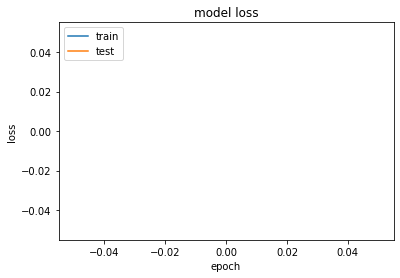

In [78]:
plt.plot(stock_price['Date'])
plt.plot(stock_price['Open'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


With this, we have come to the end of creating a hybrid model for Stock Market Prediction using Numerical and Textual Analysis. The model and weighst are saved as model.json and model.h5 respectie

# THANK YOU